In [1]:
from __future__ import division
import numpy as np
import itertools
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

/Users/jsubapple/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Use the functions from another notebook in this notebook
%run SharedFunctions.ipynb

[[0.0, 10, 6, 0.0, 'Rejected'], [0.10000000000000001, 10, 6, 0.00019920318725099608, 'Rejected'], [0.20000000000000001, 10, 6, 0.0073921971252566745, 'Rejected'], [0.30000000000000004, 10, 6, 0.06887653830885271, 'Rejected'], [0.40000000000000002, 10, 6, 0.20258449304174947, 'Accepted'], [0.5, 10, 6, 0.756210866491618, 'Accepted'], [0.60000000000000009, 10, 6, 1.0, 'Accepted'], [0.70000000000000007, 10, 6, 0.501407884151247, 'Accepted'], [0.80000000000000004, 10, 6, 0.12150472741903036, 'Accepted'], [0.90000000000000002, 10, 6, 0.013460015835312748, 'Rejected'], [1.0, 10, 6, 0.0, 'Rejected']]
[[0.6, 20, 0, 0.0, 'Rejected'], [0.6, 20, 1, 0.0, 'Rejected'], [0.6, 20, 2, 0.0, 'Rejected'], [0.6, 20, 3, 0.0, 'Rejected'], [0.6, 20, 4, 0.0, 'Rejected'], [0.6, 20, 5, 0.0022226712467165086, 'Rejected'], [0.6, 20, 6, 0.011450381679389315, 'Rejected'], [0.6, 20, 7, 0.037015043547110056, 'Rejected'], [0.6, 20, 8, 0.11187677340899879, 'Accepted'], [0.6, 20, 9, 0.17528271405492732, 'Accepted'], [0.6,

# From Probability to Statistical Inference

[NOTE: The treatment of classical statistical inference in this chapter relies on Gigerenzer et. al.]

In the coin tossing experiments, we simulated the results of tossing a coin with a particular bias. If we know he bias of the coin, then we can simulate the behavior of the coin.

But suppose I come to you with the following data or evidence: I've tossed this particular coin 10 times and observed 3 heads.

Now try to answer this question: **What is the bias of the coin towards heads?**

This is the central question of statistical inference. And it's worth a bit of explanation.

### Conditional Probability

If we know the probability of an event, it's quite easy to calculate things based on that probability. It's easy to simulate a number of these events based on the given probability. When we do these calculations we typically move from knowing something about the world to discovering the consequences of that knowledge. For example, 

$P(5 \ H \ in \ 10 \ tosses \ | \ bias = 0.3)$

which is a notation for the probability that we get 5 heads in 10 tosses of a coin *if we already know that the coin has a bias towards heads of 0.3*. This notion of the probabilty of something *given* that we know something else for sure is called *conditional probability*. That's all you need to know about conditional probability for the moment (or perhaps even forever!).

Well, how easy is that -- we can use our coin tossing experiment to produce the answer.

If you go to Question 1 in the Questions and Exercises section of the Coin-Tossing Experiments notebook, you'll see that answer is 0.10 or roughly 10% of the time.

That's the easy part. Now try this question: What is the probability that the bias of the coin is 0.3 given that you've tossed the coin 10 times and observed 5 heads? In other words what is

$P(\ bias = 0.3 \ | \ 5 \ H \ in \ 10 \ tosses \ )$?

You might think the difference between these two conditional probabilities is small, but you'd be mistaken. They're quite different! To see this, consider,

$P(Today \ is \ a \ Weekday \ | \ Today \ is \ Tuesday \ ) \neq P(Today \ is \ Tuesday \ | \ Today \ is \ a \ Weekday \ )$

Of course the conditional probability on the left is 1 -- Tuesday is by definition a weekday. But if all you know is that today is a weekday, then you only have a probability of 1/5th that today is Tuesday. 1 is quite differnt from 1/5.

If there is any sense in us using data to infer some knowledge about the world, then the second conditional probability is precisely the kind of question we *must* be able to answer. The machinery of P-values and significance tests is one approach to solving this problem.

4 approaches
- Fisher's p-value calculation (single hypothesis, just report the p-values, *no* rejection/acceptance, single experiment - no repeated trials; use when you have very little information about the hypothesis.)
- Neyman and Pearson (two hypotheses, reject one/accept the other, repeated trials; concept of statistical power comes into the picture; no notion of confidence interval yet but can be gotten by fixing beta from the start and asking about the discriminatory power of the experiment?)
- The mixing of Fisher/Neyman-Pearson -- the melange (typically what's taught; single hypothesis, set significance level, reject or accept based on p-value, concept of confidence interval tied to what cannot be rejected; no concept of power)

We're very good at simulating coin tosses when we know the bias of a coin. But now someone's come to us with the following problem. They've tossed a particular coin 10 times and observed 5 heads. They want to know what the bias of the coin is. Or to put it differently, they've sampled 10 bulbs produced by a factory and found 5 of them to be defective. They want to know what percentage of the factory's light bulb production as a whole is defective. Or they've asked 10 people who they just voted for and found that 5 voted for Brackley. They want to know the overall percentage of votes that Brackley will get. See how well the coin-tossing experiment fits various things we'd like to infer from data?

The first thing we do to answer any of the above questions is calculate the p-value of observing 5 heads in 10 tosses of a coin.

## Fisher's P-Values

Step 1: We don't know yet what the probability of the coin's bias is, given that we've seen 5 heads in 10 tosses. But, let's just *assume* that the coin has a bias of 0.3. We could assume any value within the range of possible biases (0 to 1) -- there's nothing special about picking 0.3. You just have to pick some value to start.

Step 2: Based on the assumption in step 1, generate what the world should look like. In other words, what *should* we see based on our assumption? This is our familiar problem from before and can be readily solved -- see Exercise 1 in the Coin-Tossing Experiments notebook.

If we assume that the coin's bias is 0.3, then we can read off the probability that we should see 5 heads in 10 tosses from the table below.

In [3]:
# Find the probability of number of heads when the bias is 0.3
outcomes = [probCoinTossOutcome(0.3, 10, i) for i in range(11)]
# Remove the slack from each outcome
print tabulate(outcomes, ["Bias", "Num Tosses", "Num Heads", "Slack", "Proability"])

  Bias    Num Tosses    Num Heads    Slack    Proability
------  ------------  -----------  -------  ------------
   0.3            10            0        0        0.0324
   0.3            10            1        0        0.1122
   0.3            10            2        0        0.2262
   0.3            10            3        0        0.2714
   0.3            10            4        0        0.2028
   0.3            10            5        0        0.1018
   0.3            10            6        0        0.0344
   0.3            10            7        0        0.0076
   0.3            10            8        0        0.0014
   0.3            10            9        0        0
   0.3            10           10        0        0.0002


In [4]:
# Get just the num heads and p-values to plot
probVals = [outcome[4] for outcome in outcomes]
print probVals

[0.0324, 0.1122, 0.2262, 0.2714, 0.2028, 0.1018, 0.0344, 0.0076, 0.0014, 0.0, 0.0002]


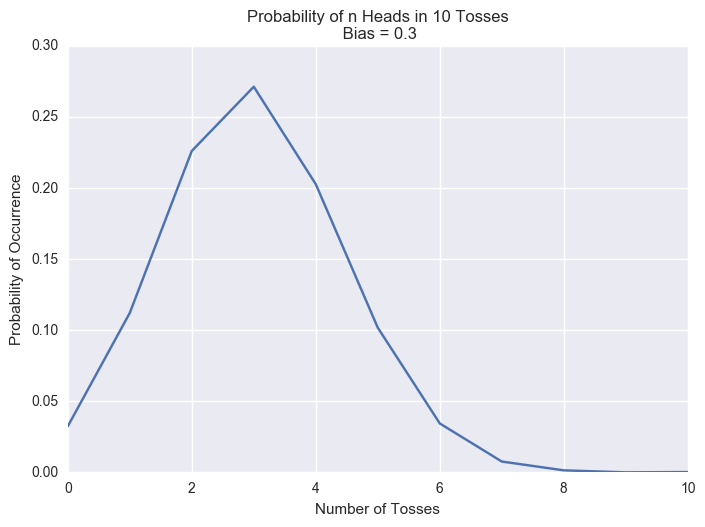

In [5]:
sns.set_style("darkgrid")
plt.plot(probVals)
plt.xlabel("Number of Tosses")
plt.ylabel("Probability of Occurrence")
plt.title("Probability of n Heads in 10 Tosses\n Bias = 0.3")
plt.show()

Step 3: The question we ask now is, how probable is it to get 5 heads in 10 tosses when the coin has a bias of 0.3? Let's see...from the table above, it's about 0.1. Well, there are certainly other values that are more probable, e.g., getting 2 heads in 10 tosses (probability around 0.2) when the coin has a bias of 0.3. And there are other values that are less probable, e.g., getting 7 heads in 10 tosses (probability around 0.01).

Step 4: The p-value of a result (say 5 heads in 10 tosses of the coin) is the sum of the probability of that result and the probabilities of all results that are equally or less probable than the result. In our case, the p-value of getting 5 heads in 10 tosses when the coin has a bias of 0.3 is 0.10 (from the table above). I

The outcomes that have probabilities of 0.10 or lower are:
    - p(0 heads) = 0.02
    - p(5 heads) = 0.10
    - p(6 heads) = 0.04
    - p(7 heads) = 0.01
    - p(8 heads) = 0.001
    - p(9 heads) = 0
    - p(10 heads) = 0

We sum up the probabilities of all outcomes that are equal or lower in probability (i.e., more extreme) to the evidence we've seen (5 heads in 10 tosses). We can generate the p-values for all of the outcomes...

In [6]:
outcomes = [coinTossPValue(0.3, 10, i, 0, "two-tailed") for i in range(11)]
print tabulate(outcomes,
               ["Bias Hypothesis", "Number of Tosses","Number of Heads", "P-Value"], 
               tablefmt="simple")

  Bias Hypothesis    Number of Tosses    Number of Heads     P-Value
-----------------  ------------------  -----------------  ----------
              0.3                  10                  0  0.0372298
              0.3                  10                  1  0.303085
              0.3                  10                  2  0.7364
              0.3                  10                  3  1
              0.3                  10                  4  0.513052
              0.3                  10                  5  0.172495
              0.3                  10                  6  0.0707376
              0.3                  10                  7  0.0109689
              0.3                  10                  8  0.00242669
              0.3                  10                  9  0
              0.3                  10                 10  0


In [7]:
[0.05 for i in range(11)]

[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

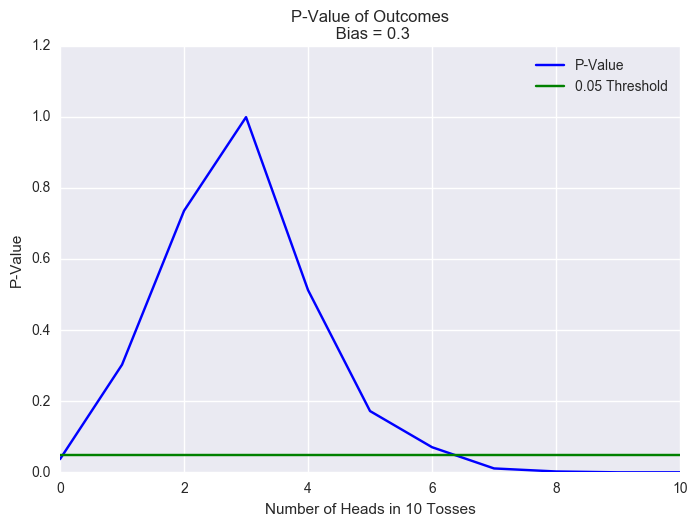

In [36]:
sns.set_style("darkgrid")
plt.plot([outcome[3] for outcome in outcomes], "b-", label="P-Value")
plt.plot([0.05 for i in range(11)], "g-", label="0.05 Threshold")
plt.xlabel("Number of Heads in 10 Tosses")
plt.ylabel("P-Value")
plt.title("P-Value of Outcomes\n Bias = 0.3")
plt.legend(loc=1)
plt.show()

Here are the p-values and the probabilities all in the same plot.

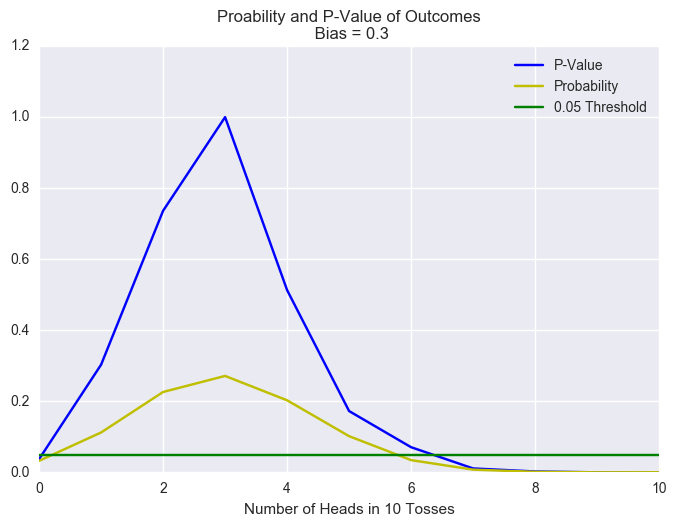

In [33]:
sns.set_style("darkgrid")
plt.plot([outcome[3] for outcome in outcomes], "b-", label="P-Value")
plt.plot(probVals, "y-", label="Probability")
plt.plot([0.05 for i in range(11)], "g-", label="0.05 Threshold")
plt.xlabel("Number of Heads in 10 Tosses")
plt.title("Proability and P-Value of Outcomes\n Bias = 0.3")
plt.legend(loc=1)
plt.show()

And that's it. Those are the 4 steps of Fisher's method. To reiterate, here's the definition from Andrew Vickers' book *What is P-Value Anyway?* (p.59): "The p-value is the probability that the data would be at least as extreme as those observed if the null hypothesis were true." Our null hypothesis is that the coin has a bias of 0.3.

Observations About Fisher's P-Value Recipe

- It doesn't say anything about accepting or rejecting the null hypothesis -- you may have heard that this is how statistical inference works. But that was not Fisher's take on things. It turn out that history is not a luxury but is important in understanding statistical inference.
- Every possible result of an experiment has a p-value.
- The calculation of a p-value for an experiment makes no assumption about repeating the experiment a number of times. In fact Fisher militated against this way of thinking of scientific activity as conducting multiply repeated experiments -- he thought it was a artifice that had no place in real scientific work.
- Note that p-values are sometimes greater than 1 due to rounding errors in the computation.

## Neyman and Pearson's Extension of Fisher's Approach

Fisher's p-values suffer from a number of well known problems -- SEE EXERCISES

In an attempt to solve some of the problems of Fisher's approach, Neyman and Pearson added a few more steps to the recipe we've seen so far.

Step 5: Statistical inference is about *two* hypotheses -- call one of these hypotheses the *null* ($H_0$) and the other the *alternative* ($H_1$). Let's choose the null hypothesis to be the hypothesis that the coin's bias is 0.3 and the let the alternative hypothesis be that the coin's bias is 0.6.  

Step 6: Set the threshold for the null hypothesis p-value. This is called $\alpha$. (Neyman and Pearson did not specify the value of $\alpha$ -- this was up to the experimenter but had to be set before the experiment was started. Typically, the value of $\alpha$ is set at either 0.05 or 0.1. We'll pick an $\alpha$ value of 0.05 to start.)

DON'T NEED TO SET BETA -- BETA WILL EMERGE LATER
[[Step 7: Set the threshold for the alternative hypothesis p-value. This is called $\beta$. (As with $\alpha$ Neyman and Pearson did not specify the value of $\beta$ -- this was up to the experimenter but had to be set before the experiment was started. We'll pick a $\beta$ value of 0.1 to start.)]]

There are more steps to the Neyman-Pearson but let's first generate the p-values for the alternative hypothesis and plot the null and alternative hypothesis p-values.

In [38]:
outcomes6 = [coinTossPValue(0.6, 10, i, 0, "two-tailed") for i in range(11)]
print tabulate(outcomes6,
               ["Bias Hypothesis", "Number of Tosses","Number of Heads", "P-Value"], 
               tablefmt="simple")

  Bias Hypothesis    Number of Tosses    Number of Heads      P-Value
-----------------  ------------------  -----------------  -----------
              0.6                  10                  0  0.000199561
              0.6                  10                  1  0.00222043
              0.6                  10                  2  0.0202041
              0.6                  10                  3  0.104911
              0.6                  10                  4  0.207068
              0.6                  10                  5  0.545365
              0.6                  10                  6  1
              0.6                  10                  7  0.754914
              0.6                  10                  8  0.335344
              0.6                  10                  9  0.061131
              0.6                  10                 10  0.00892149


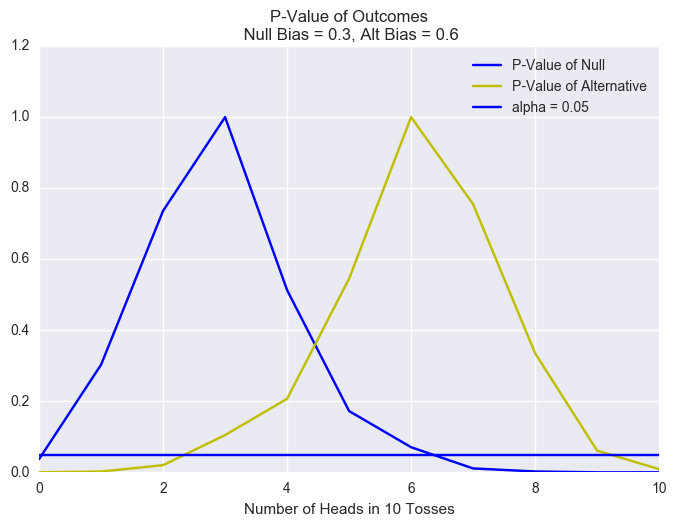

In [48]:
sns.set_style("darkgrid")
plt.plot([outcome[3] for outcome in outcomes], "b-", label="P-Value of Null")
plt.plot([outcome6[3] for outcome6 in outcomes6], "y-", label="P-Value of Alternative")
plt.plot([0.05 for i in range(11)], "b-", label="alpha = 0.05")
plt.xlabel("Number of Heads in 10 Tosses")
plt.title("P-Value of Outcomes\n Null Bias = 0.3, Alt Bias = 0.6")
plt.legend(loc=1)
plt.show()

Step 7: If the p-value, i.e., the sum of the probabilities of all outcomes that are equal or lower in probability (i.e., more extreme) to the evidence we've seen (5 heads in 10 tosses) is *less than or equal to $\alpha$ = 0.05* (let's call the value 0.05 the "threhold"), then "reject" the hypothesis that the coin's bias is 0.3 and "accept" the hypothesis that the coin's bias is 0.6. On the contrary, if the p-value is greater than 0.05, then the hypothesis that the coin has bias 0.3 cannot be "rejected" (but it cannot be accepted either). [What happens to the alternative hypothesis?]

So these 7 steps make up the Neyman-Pearson approach to statistical inference.

Using the threshold for the null hypothesis (flat blue line), we see that we cannot reject the null hypothesis nor the alternative hypothesis when we get 3, 4, 5, or 6 heads out of 10 tosses. This is a dead zone which doesn't allow us to conclude/infer anything. that the coin has a bias of 0.3 if we get 3, 4, 5 or 6 heads out of 10 tosses. Similarly, using the threshold for the alternative hypothesis (flat yellow line), we see that we cannot reject the alternative hypothesis if we get 4, 5, 6, 7, or 8 heads out of 10 tosses. When we get 4, 5, or 6 heads out of 10 tosses of the coin, our experiment cannot distinguish between the null hypothesis and the alternative hypothesis. This brings us to the concept of *statistical power*.

Power -- if there are true positives, how frequently can the experiment find them? We'll get to this by asking the following question: How can we increase the discrimination power of the experiment?

Let's try a few things.

### Make the Thresholds Higher?
First let's change the value of $\beta$. Let's plot the same graph as above but now with a bunch of different $\beta$ values.

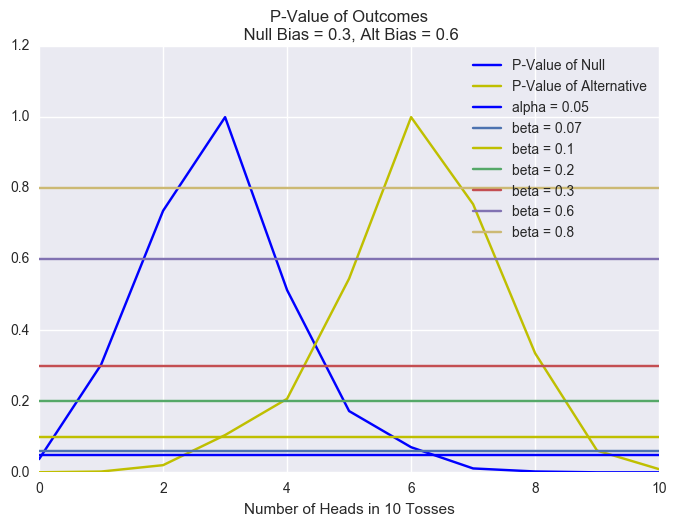

In [47]:
sns.set_style("darkgrid")
plt.plot([outcome[3] for outcome in outcomes], "b-", label="P-Value of Null")
plt.plot([outcome6[3] for outcome6 in outcomes6], "y-", label="P-Value of Alternative")
plt.plot([0.05 for i in range(11)], "b-", label="alpha = 0.05")
plt.plot([0.06 for i in range(11)], label="beta = 0.07")
plt.plot([0.1 for i in range(11)], "y-", label="beta = 0.1")
plt.plot([0.2 for i in range(11)], label="beta = 0.2")
plt.plot([0.3 for i in range(11)], label="beta = 0.3")
plt.plot([0.6 for i in range(11)], label="beta = 0.6")
plt.plot([0.8 for i in range(11)], label="beta = 0.8")
plt.xlabel("Number of Heads in 10 Tosses")
plt.title("P-Value of Outcomes\n Null Bias = 0.3, Alt Bias = 0.6")
plt.legend(loc=1)
plt.show()

Let's start with $\beta$ = 0.3. At this threshold, we cannot reject the alternative hypothesis if we get 5, 6, 7, or 8 heads out of 10 tosses. And like before we can't reject null hypothesis if we get 1, 2, 3, 4, 5, or 6 heads out of 10 tosses.

Increasing the thresholds helps a lot in order to discriminate between two hypotheses! Imagine if we set both $\alpha$ and $\beta$ to 0.4 there would be no overlap and we could readily plump for one hypothesis or the other not matter what result we get. But this is dangerous; to see why, think about what the threholds *mean*. The higher the threshold, the easier it is to "reject" the hypothesis -- this means we can reject the null hypothesis when it's actually true, i.e., a false positive. When $\alpha$ is set high, we get a lot of false positives. Similarly, when $\beta$ is set high, we get a lot of false negatives: we reject the alternative hypothesis when it's actually true and accept the null hypothesis when it's actually false.

We now appreciate what the thresholds mean in terms of rejection and acceptance. In general, when we set the p-value threshold of T for rejecting a hypothesis, we are susceptible to "rejecting" when we should not have "rejected" (T x 100)% of the time. So the threshold gives us a way to control the error we're willing to make.

### Increase Separation Between the Hypotheses

### What Does the 0.05 Threshold Mean and What's Special About It?

By now you're probably asking yourself what's so special about the 0.05 threshold and why "reject" is in scare quotes? Let's get to these questions. 

EDIT[[Before we do, you should be aware that the concept of significance testing is *fundamentally flawed*. Yes, that's right. I've said it. I'll point these out in a separate notebook titled *Why_Significance_Tests_Are_Useless*. However, there are a number of commonly used statistical concepts (confidence level, confidence interval, etc.) that are based on significance tests; so it's good to understand the concept of significance testing thoroughly before we go on to see what's wrong with it.]]

By definition, the p-value of an outcome is the probability that it or some more extreme outcome occurs given the hypothesis. For example, if the hypothesis is that the coin has a 0.3 bias, then the probability of obtaining 5 heads in 10 tosses of the coin or a more extreme result -- i.e., a lower probability result than that --- is (from the table above) 0.1024. So roughly 10% of the time, we **are** going to get 5 heads in 10 tosses when the coin has a bias of 0.3. This means roughly 90% of the time we're going to get some number **other** than 5 heads in 10 tosses when the coin has a bias of 0.3.

Say we set our threshold p-value just for kicks at 0.1024 instead of 0.05. This means that when we get 5 heads in 10 tosses, we "reject" the hypothesis that the coin has bias of 0.3. But we already know that if a coin's bias is 0.3 we're going to see 5 heads in 10 tosses roughly 10% of the time. So if we "reject" the hypothesis that the coin has a bias of 0.3 at the threshold p-value of 0.1024, it means that 10% of the time we will have "rejected" wrongly. On the flip side, 90% of the time we will have "rejected" correctly. In general, when we set the p-value threshold of T for rejecting a hypothesis, we are susceptible to "rejecting" when we should not have "rejected" (T x 100)% of the time. So the threshold gives us a way to control the error we're willing to make. The threshold is called the *Significance Level* and it's usually written as $\alpha$.

### What Does "Reject" Mean?

If we follow the recipe for calculating p-values, all we can say is, *if* we had done the experiment a large number of times and *if* each time the coin's bias had indeed been 0.3 (for instance), we will see this result (say 5 heads in 10 tosses) a certain percentage of the time. What does this have to do with disconfirmation? Nothing whatsoever.

What we really want is to know how much the evidence (5 heads in 10 tosses) impacts the hypothesis that the coin has bias 0.3. Instead of $P(\ bias = 0.3 \ | \ 5 \ H \ in \ 10 \ tosses \ )$, what we've done is find $P(5 \ H \ in \ 10 \ tosses \ | \ bias = 0.3)$ along with $P(0 \ H \ in \ 10 \ tosses \ | \ bias = 0.3)$, $P(1 \ H \ in \ 10 \ tosses \ | \ bias = 0.3)$, and so on. We've never really gotten to the real question we need to answer, namely:

$$P(\ bias = 0.3 \ | \ 5 \ H \ in \ 10 \ tosses \ )$$

And unfortunately, in the p-value way of doing things, we'll *never* be able to answer this question. That's why we can't take the "reject" clause in our recipe seriously. We'll have to treat it with caution. Just keep in mind that it definitely doesn't mean that our hypothesis is disconfirmed. Nor does it maean that a hypothesis is confirmed if it is not "rejected". 

Rejecting the null hypothesis at a p-value of 0.05 does NOT mean that the we're 95% certain that the null hypothesis is false. It merely means that the null hypothesis is false (i.e., 100% certain to be false) OR, the null hypothesis is true (i.e., 100% certain to be true) AND we've just seen a rare event (which is perfectly compatible with the null hypothesis being true. But this is simply to state a tautology -- hence, there is no information in rejecting the null hypothesis.

Nor is there any information in *not* "rejecting" the null hypothesis. As Andrew Vickers writes (*What is P-Value Anyway*, p.62):

"Just before I started writing this book, a study was published reporting about a 10% lower rate of breast cancer in women who were advised to eat less fat. If this is indeed the true difference, low fat diets could reduce the incidence of breast cancer by tens of thousands of women each year -- astonishing health benefit for something as simple and inexpensive as cutting down on fatty foods. The p-value for the difference in cancer rates was 0.07 and here is the key point: this was widely misinterpreted as indicating that low fat diets don't work. For example, the *New York Times* editorial page trumpeted that 'low fat diets flub a test' and claimed that the study provided 'strong evidence that the war against all fats was mostly in vain'. However, failure to prove that a treatment is effective is not the same as proving it ineffective. This is what statisticians call 'accepting the null hypothesis'."

It's ironic that the very thing you would expect to be able to do from significance testing -- making inferences about the extent to which evidence substantiates or vitiates a hypothesis -- is precisely the thing that cannot be done. It's a mystery why people pay any heed to significance tests!

### Why Add Up the More Extreme Events?

We don't just take the probability of the getting 5 heads in 10 tosses as the event's p-value for 2 reasons. First, the technical reason that for continous event values, this probability will be 0. So we have to take some region of values around the event value we're interested in. So what should this region be?

Second, it can't be regions which have higher probability -- this means we'll "reject" a lot more than we want to. It can't be just some regions of lower probability because that would be arbitrary. So it must be all regions that have probabilities that are equal to or lower than the event region under consideration.

But before we cover the problems of p-values and significance testing that go beyond the fact that the tests can reveal nothing in the first place, let's understand some key concepts that have come out of the significance test methodology such as confidence levels, confidence intervals, margins of error. If nothing else, it will equip us to better understand the flood of "statistical results" that we are presented with.

### Confidence Levels and Confidence Intervals

If you run your eyes down the table in Exercise 4 of the Coin-Tossing_Experiments notebook and look for p-values that are above 0.05, you'll find these occur for biases 0.3, 0.4, 0.5, 0.6, and 0.7. In other words, when we toss a coin 10 times and observe 5 heads, we cannot "reject" the possibility that the coin can have a bias anywhere between 0.3 and 0.7. That's the best we can do with this evidence.

Given what we know about the threshold p-value of 0.05, we know that we'll be making a mistake by not "rejecting" the biases 0.3, 0.4, 0.5, 0.6, and 0.7 only 5% of the time. Or, we'll be correct to not "reject" the biases 0.3, 0.4, 0.5, 0.6, and 0.7 95% of the time. (If we imagine tossing the coin 10 times and then repeating that several times over -- i.e., doing several "trials" of the same experiment.) It's not always practically possible to repeat an experiment many times and we'll get to that point again a bit later.

So another way to put it, based on the definition of 0.05 as our threshold p-value, is to say: If we see 5 heads (the evidence) in 10 tosses of coin (the experiment), we can with *95% confidence* say that the coin's bias is either 0.3, 0.4, 0.5, 0.6, or 0.7. Or to put it less precisely, the coin's bias is between 0.3 to 0.7 with a *confidence level* of 95%. Or we can say, our *95% confidence interval* for the coin's bias is the range 0.3 to 0.7.

That sounds similar to the "margin of error of plus or minus 5%" we're used to hearing when the results of polls are reported. And we can translate our statement into that language as well by saying, *at the 95% confidence level, the coin's bias is 0.5 plus or minus 0.2*.

So just by tossing a single coin 10 times (the experiment) and observing the number of heads we get (the evidence), we've defined and calculated the p-value for each possible outcome (by simulating a large number of trials of the experiment), arrived at the notion of a confidence level (based on choosing a p-value threshold), and translated that into a confidence interval and finally a statement about the margin of error at a particular confidence level.

The range of bias values from 0.3 to 0.7 is fairly large -- a coin with a 0.3 bias is likely to behave quite differently from a coin with 0.7 bias. But the evidence we have cannot seem to discriminate between these possibilities.

There are two ways in which we can shrink our confidence intervals. Let's look at these ways.

#### Increase the Significance Level

As we saw above, there's nothing magical in the significance level of 0.05. All it means is that we're only 5% likely to reject the null hypothesis when it shouldn't be rejected. If we increase the significance level to 0.2, for example, we run more of a risk of rejecting the null hypothesis when we really shouldn't (we're likely to do this 20% of the time). But as you can see from the table in Exercise 4 of the Coint-Tossing_Experiments notebook, our confidence interval now is the benefit of increasing the significance level to 0.2 is to narrow the possibilities of biases to between 0.4 and 0.6 (reduced from the previous range 0.3 to 0.7). But the tradeoff to achieving a more precise range of bias is a corresponding increase in the possibility of wrongly rejecting the null hypothesis. Based on what we know it means to "reject" the null hypothesis, this might not be a tradeoff to worry about at all.

#### Get More Data

One way to make the confidence interval smaller without changing the significance level is to toss the coin more than 10 times. This gets us a larger sample size and more data to work with. 

If we look at the tables in Exercise 6 in the Coin-Tossing_Experiments notebook, we can see how having more coin tosses can help narrow the confidence interval.

But before we get to the concept of power, we have to solve for the right thing anyway -- the probability of the hypothesis given the evidence. When we solve this problem we'll use some concepts that will give us the scaffolding to understand power, sensitivity, selectivity, accuracy, precision, recall, bias, and variance.

### Adding a Second Hypothesis - Statistical Power

In addition to bringing in the concept of accepting or rejecting a hypothesis Neyman and Pearson added another critical element -- *a well defined second hypothesis* to compare with the null hypothesis. With a single hypothesis the notion of a confidence interval comes into focus; with 2 hypotheses we can make sense of the notion of statistical power.

Suppose we have the same coin. Our null hypothesis is the coin has a bias of 0.3. But what if it didn't? Is there another non-arbitrary second hypothesis? Let's pick a bias of 0.6 (it seems sufficiently different that we could imagine if one hypothesis were false the other could be true.

It's not hard to see how this dual-hypothesis scenario works. We just create p-values for each hypothesis separately and then combine them.

In [9]:
# Plot the p-values for the 2 hypotheses
hyp3Vals = [x[3] for x in [coinTossPValue(0.3, 10, i, 0, "two-tailed") for i in range(11)]]
print hyp3Vals

[0.043660287081339705, 0.3148185281732504, 0.7271462639109699, 1.0, 0.5028135048231511, 0.17991035044824777, 0.07561214495592557, 0.010515672396359959, 0.0021925453458241976, 0.00020202020202020205, 0.0]


## The Current Melange of Null Hypothesis Significance Testing

## Addressing the Real Question - The Bayesian Approach

So far we've been spinning our wheels without really getting to the question we're really interested in: how much does the evidence of seeing 5 heads in 10 tosses tell us about our hypothesis that the coin has a bias of 0.3 towards heads? Rather, our calculations have all been about the probability of seeing 5 heads in 10 tosses *given* the coin has a bias of 0.3. In other words, we need to find $P(\ bias = 0.3 \ | \ 5 \ H \ in \ 10 \ tosses \ )$ and what we've been up to is monkeying with $P(5 \ H \ in \ 10 \ tosses \ | \ bias = 0.3)$.

How do we go about finding $P(\ bias = 0.3 \ | \ 5 \ H \ in \ 10 \ tosses \ )$?

### The Probability of H and E

**For more detail on probability, check out the *Probability by Simulation* notebook.**

If H is our hypothesis that the coin's bias is 0.3 and E is the evidence that we see 5 heads in 10 tosses of the coin, what is $P(H \& E)$?
In general, the probability of the conjunction of two events is
$$P(H \& E) = P(H) * P(E | H)$$
We also know that
$$P(H \& E) = P(E \& H)$$
Therefore,
$$P(H \& E) = P(H) * P(E | H) = P(E \& H) = P(E) * P(H | E)$$
Which means, 
$$P(H) * P(E | H) = P(E) * P(H | E)$$

This is a nice forumula to keep in mind! Remember, we've had no problem finding the $P(E \| H)$. That's what we've been doing in the Exercises in the notebook titled *Coin-Tossing_Experiments*. The scheme of using p-values to test hypotheses *never* calculates $P(E | H)$; all it does is calculate $P(H | E)$. But now our nice formula has given us a way to calculate what we really need!

$$P(H | E) = P(H) * P(E | H) / P(E)$$

Let's see if we have the information we need to calculate the right hand side of the equation above. The $P(E | H)$ is easy -- we've been doing that for a while. But what about $P(H)$ and $P(E)$?
- What's the probability that the coin has a 0.3 bias? Of all the coins in the world, how many of them have a bias of 0.3 towards heads? How can I ever know this? 
- And what's the raw probability of seeing 5 heads in 10 tosses of a coin (given nothing)? Does this question even make sense? 

Tough questions. Nice formula in theory, but can we acutally use it to calculate? [Looks like the Standard Model before t'Hooft's normalization.] 

### The Probability of H Given E

I have no idea what $P(bias\ =\ 0.3)$ is. I could try to get a sample of 100 coins from an urn containing 1,000 coins. But even then, the only way I can know what the bias of a coin is is to infer it from the p-value. But that doesn't give me any way to know what the bias of the coin is, so I'm back to step 1. A real mess. By the way, $P(bias\ =\ 0.3)$ is called the *prior*.

The value for $P(5\ heads\ in\ 10\ tosses)$ seems even harder! But it can be simplified by realizing that
$$P(5\ heads\ in\ 10\ tosses) = P(5\ heads\ in\ 10\ tosses\ |\ bias\ =\ 0.1) * P(bias\ =\ 0.1) + P(5\ heads\ in\ 10\ tosses\ |\ bias\ =\ 0.2) * P(bias\ =\ 0.2) + \ldots + P(5\ heads\ in\ 10\ tosses\ |\ bias\ =\ 0.9) * P(bias\ =\ 0.9)$$

We certainly know how to calculate $P(5\ heads\ in\ 10\ tosses\ |\ bias\ =\ 0.1)$ but once again, we're left with not knowing how to calculate $P(bias\ =\ 0.1)$. But at least we've reduced this problem to our first problem. If we know all possible priors, we can calcuate $P(5\ heads\ in\ 10\ tosses)$.

When I'm stuck knowing how to calculate a value, I experiment by plugging in a bunch of possible values. Whatever $P(bias\ =\ 0.3)$ is, we know it must be between 0 and 1. Why not try out a few values and see how $P(H|E)$ evolves?

We could pick $P(bias\ =\ 0.3) = 0.5$. This says that of all the coins in the world (or those accessible to me, anyway), half of them have a bias of 0.3. There's no way I can know that (we'll see how to try in the notebook titled *Polling*), so I'm just making a guess. 

But not only do we need to pick a probability for the bias of 0.3, we'll have to pick it for every possible bias. To make our lives easier, let's build a function that creates a discrete probability distribution (see Exercise 1 below).

We already know how to calculate the $P(5\ heads\ in\ 10\ tosses\ |\ bias\ =\ x)$ for any x value using the probCoinTossOutcome function we defined in the notebook titled *SharedFunctions*. 

In [10]:
probEvidenceGivenBiases = [probCoinTossOutcome(i,10,5) for i in np.arange(0,1.1,0.1)]
print probEvidenceGivenBiases

[[0.0, 10, 5, 0, 0.0], [0.10000000000000001, 10, 5, 0, 0.0014], [0.20000000000000001, 10, 5, 0, 0.026], [0.30000000000000004, 10, 5, 0, 0.11], [0.40000000000000002, 10, 5, 0, 0.202], [0.5, 10, 5, 0, 0.256], [0.60000000000000009, 10, 5, 0, 0.2034], [0.70000000000000007, 10, 5, 0, 0.1084], [0.80000000000000004, 10, 5, 0, 0.027], [0.90000000000000002, 10, 5, 0, 0.0018], [1.0, 10, 5, 0, 0.0]]


In [11]:
print tabulate(probEvidenceGivenBiases)

---  --  -  -  ------
0    10  5  0  0
0.1  10  5  0  0.0014
0.2  10  5  0  0.026
0.3  10  5  0  0.11
0.4  10  5  0  0.202
0.5  10  5  0  0.256
0.6  10  5  0  0.2034
0.7  10  5  0  0.1084
0.8  10  5  0  0.027
0.9  10  5  0  0.0018
1    10  5  0  0
---  --  -  -  ------


We don't know what the probability of each bias, but we can set up a discrete distribution at random using the discreteRandomDist function defined in the *SharedFunctions* notebook as well as in Exercise 1 below.

In [12]:
probHypotheses = discreteRandomDist(np.arange(0,1.1,0.1))
print probHypotheses

[(0.0, 0.098106174698698576), (0.10000000000000001, 0.16739256387654131), (0.20000000000000001, 0.13418803772957874), (0.30000000000000004, 0.026562974876561913), (0.40000000000000002, 0.011894101037120847), (0.5, 0.0270440662834176), (0.60000000000000009, 0.13676239901589529), (0.70000000000000007, 0.074292394741896278), (0.80000000000000004, 0.080806735542322525), (0.90000000000000002, 0.16599099759642055), (1.0, 0.076959554601546284)]


In [13]:
print tabulate(probHypotheses)

---  ---------
0    0.0981062
0.1  0.167393
0.2  0.134188
0.3  0.026563
0.4  0.0118941
0.5  0.0270441
0.6  0.136762
0.7  0.0742924
0.8  0.0808067
0.9  0.165991
1    0.0769596
---  ---------


O.K., we now have enough to answer our original question. We know that 
$$P(bias\ =\ 0.3\ |\ 5\ heads\ in\ 10\ tosses) = P(bias\ =\ 0.3) * P(5\ heads\ in\ 10\ tosses\ |\ bias\ =\ 0.3) / P(5\ heads\ in\ 10\ tosses)$$

$P(bias\ =\ 0.3) = $

In [14]:
(bias, probBias) = probHypotheses[3]
print probBias

0.0265629748766


$P(5\ heads\ in\ 10\ tosses\ |\ bias\ =\ 0.3) = $

In [15]:
[bias, numTosses, numEvents, slack, probEGivenH] = probCoinTossOutcome(0.3,10,5)
print probEGivenH

0.1128


In [16]:
probCoinTossOutcome(0.3,10,5)

[0.3, 10, 5, 0, 0.1012]

Now, let's calculate the $P(E) = P(5\ heads\ in\ 10\ tosses)$

In [17]:
# Probability of the evidence given each bias
pE = [probEvidenceGivenBiases[i][4] for i in range(11)]
print pE

[0.0, 0.0014, 0.026, 0.11, 0.202, 0.256, 0.2034, 0.1084, 0.027, 0.0018, 0.0]


In [18]:
# Probability of the hypotheses
pH = [probHypotheses[i][1] for i in range(11)]
print pH

[0.098106174698698576, 0.16739256387654131, 0.13418803772957874, 0.026562974876561913, 0.011894101037120847, 0.0270440662834176, 0.13676239901589529, 0.074292394741896278, 0.080806735542322525, 0.16599099759642055, 0.076959554601546284]


In [19]:
# Probability of the evidence
pEvObtained = np.sum(np.multiply(pE, pH))
print pEvObtained

0.05432238839


In [20]:
# So, the answer to the question of how much support the evidence we obtain provides support for the hypothesis
# that the coin is biased at 0.3 in favor of heads is:
pHGivenE = pE[3] * pH[3] * pEvObtained
print pHGivenE

0.000158726066184


Because this isn't a binary approach of reject or accept, there is no notion of confidence intervals. There is instead the notion of *credible intervals* which we'll further explore in the notebook titled *Using Evidence to Learn*.

For the Bayesian method, we only need a single instance of evidence. There is no need to model things in terms of multiple trials.

Notice that we haven't used the significance test recipe in any way. That's not surprising because the significance test recipe doesn't really answer the question we're after.

# Exercises

## Exercise 1

Create a function that will generate a discrete probability distribution with random values for the probabilities of each discrete state.

Answer: See the SharedFunctions notebook.

In [21]:
discreteRandomDist(["a", "b", "c"])

[('a', 0.49637652405254101),
 ('b', 0.32257616122438248),
 ('c', 0.18104731472307656)]

In [22]:
print tabulate(discreteRandomDist(["a", "b", "c"]))

-  --------
a  0.54797
b  0.343802
c  0.108228
-  --------


In [23]:
# More suitable to the outcomes of coin tosses
discreteRandomDist(range(11))

[(0, 0.1351917546128284),
 (1, 0.029930012946076511),
 (2, 0.034082170488026642),
 (3, 0.064137583017622873),
 (4, 0.17511356271680104),
 (5, 0.15807228533158801),
 (6, 0.014030782615103933),
 (7, 0.1200287594575937),
 (8, 0.072826245233814035),
 (9, 0.077471711015054165),
 (10, 0.11911513256549078)]

In [24]:
print tabulate(discreteRandomDist(range(11)))

--  ---------
 0  0.170828
 1  0.171775
 2  0.108897
 3  0.0371847
 4  0.195113
 5  0.0253856
 6  0.0607832
 7  0.0480797
 8  0.063445
 9  0.0180689
10  0.10044
--  ---------


In [25]:
list(np.arange(0,1.1,0.1))

[0.0,
 0.10000000000000001,
 0.20000000000000001,
 0.30000000000000004,
 0.40000000000000002,
 0.5,
 0.60000000000000009,
 0.70000000000000007,
 0.80000000000000004,
 0.90000000000000002,
 1.0]

In [26]:
inputPriors = discreteRandomDist(np.arange(0,1.1,0.1))
print tabulate(inputPriors)

---  ----------
0    0.135498
0.1  0.00729135
0.2  0.118223
0.3  0.0556789
0.4  0.108043
0.5  0.0634399
0.6  0.179262
0.7  0.0359183
0.8  0.158215
0.9  0.0876247
1    0.050805
---  ----------


## Exercise 2

Create a function that calcuates the probability of a hypotheses given some evidence. The evidence is going to be a certain number of heads in a certain number of tosses. The hypothesis is going to be about the bias of the coin.

In [27]:
# A function that calculates the probability of a hypothesis given some evidence.
# The hypothesis is in the form of a bias value for a coin
# The priors are randomly generated
# The evidence is in the form of the number of heads observed when the coin is tosses N times.
# WORKS ONLY FOR DISCRETE OUTCOME STATES BETWEEN 0 and 1 IN INCREMENTS OF 0.1

def bayes(bias, numTosses, numEvents, slack = 0):
    
    # generate a random initial distribution for all possible biases of the coin
    # restricting the allowed biases to the Reals 0, 0.1, 0.2, ..., 0.9, 1.
    # priorDist is the prior distribution over the possible bias values for the coin.
    priorDist = discreteRandomDist(np.arange(0,1.1,0.1))
    # just get the values
    priorDistVals = [y for (x,y) in priorDist]
    
    # calculate the probability of the evidence for each possible bias value of the coin
    probEvidenceForEachBias = [probCoinTossOutcome(i,numTosses,numEvents, slack) for i in np.arange(0,1.1,0.1)]
    # just get the values and normalize them in case slack is > 0
    probEvidenceForEachBiasVals = normalize([probEvidence[4] for probEvidence in probEvidenceForEachBias])
    
    # Probability of the evidence per se - i.e., the Bayesian normalization factor
    pEvidence = np.sum(np.multiply(priorDistVals, probEvidenceForEachBiasVals))
    
    # From the priorDistVals, find the prior for the particular bias
    # CAUTION: ONLY WORKS FOR DISCRETE COIN BIASES FROM 0 TO 1 in intervals of 0.1
    biasPrior = priorDistVals[int(bias * 10)]
    
    # From the probEvidenceForAllHyposVals, find the probEvidence for the particular bias
    # CAUTION: ONLY WORKS FOR DISCRETE COIN BIASES FROM 0 TO 1 in intervals of 0.1
    probEvidenceForBias = probEvidenceForEachBiasVals[int(bias * 10)]
    
    # Finally, find the probability for that the bias is what it is, given the evidence
    bayesPBias = (biasPrior * probEvidenceForBias)/pEvidence
    
    
    return biasPrior, bayesPBias

In [28]:
bayes(0.6, 100, 50, 0)

(0.070021810286759648, 0.053838077645293095)

## Exercise 3

Create a function that takes in a prior discrete probability distribution over a set of hypotheses and generates a posterior distribution 

In [29]:
# bayesFull calculates the posterior probabilities
# of a set of hypotheses. This allows us to compare the prior with the posterior
# distribution for all hypotheses
# WORKS ONLY FOR DISCRETE SETS OF HYPO VALUES

def bayesFull(hyposAndPriorProbs, numTosses, numEvents, slack = 0):
    # hypos is the set of biases, e.g., [0, 0.1, ..., 0.9, 1.0] for the possible discrete biases of a coin
    # priorProbs is the prior probability of each of the hypos
    
    # We get hyposAndPriorProbs as the output of a function such as discreteRandomDist(np.arange(0,1.1,0.1))
    # The evidence is in the form of the number of heads observed (numEvents) 
    # when the coin is tosses N times (numTosses).
    
    # WORKS ONLY FOR DISCRETE SETS OF HYPO VALUES
    
    # Split hyposAndPriorProbs into hypos and priorProbs
    hypos = [hyposAndPriorProb[0] for hyposAndPriorProb in hyposAndPriorProbs]
    priorProbs = [hyposAndPriorProb[1] for hyposAndPriorProb in hyposAndPriorProbs]
    
    # calculate the probability of the evidence for each possible hypo
    probEvidenceForEachHypo = [probCoinTossOutcome(hypo,numTosses,numEvents, slack) for hypo in hypos]
    # just get the values and normalize in case slack > 0
    probEvidenceForEachHypoVals = normalize([probEvidence[4] for probEvidence in probEvidenceForEachHypo])
    
    # Probability of the evidence per se - i.e., the Bayesian normalization factor
    pEvidencePerSe = np.sum(np.multiply(priorProbs, probEvidenceForEachHypoVals))
    
    # Posterior distribution without Bayesian normalization
    postDistRaw = list(np.multiply(priorProbs, probEvidenceForEachHypoVals))
    
    # Bayesian normalized posterior distribution -- this is usually the one we want
    postDist = list(postDistRaw/pEvidencePerSe)
    
    return priorProbs, postDist

In [30]:
bOut = bayesFull(inputPriors, 1000, 320, 0)
print bOut

([0.13549842962609493, 0.0072913529365598029, 0.11822267472789104, 0.055678947584361906, 0.10804324472657627, 0.063439908159686698, 0.17926202534795665, 0.03591827451408755, 0.15821543935575749, 0.087624704273173024, 0.05080499874785456], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])


### Observations about the bayesFull function

- postDistRaw will not in general sum to 1 but postDist will always sum to 1. That is what we should expect.
- Normalizing postDistRaw using the normalize function is the same as dividing postDistRaw by the pEvidencePerSe. This means we don't really need to calculate pEvidencePerSe when we're interested in the complete posterior distribution; and this is what we're after anyway when we
- When there's a small amount of evidence, i.e., 10 coin tosses, the posterior probabilities can take on a wide range of values. But it's surprising how quickly the posterior probabilities converge to 0 for most of the hypotheses and 1 for a single hypothesis when the amount of evidence grows. Going from 10 tosses to 100 tosses can make a world of differnce.
- Another way to put the point is to say: the choice of a prior distribution doesn't matter when there's enough evidence. As Alan Downey writes in *Think Bayes* (p.28), "Uniformative priors are appealing because they seem more objective. But I am generally in favor of using informative priors. Why? First, Bayesian analysis is alwasy based on modeling decisions. Choosing the prior is one of those decisions, but it is not the only one, and it might not even be the most subjective. So even if an uninformative prior is more objective, the entire analysis is still subjective. Also, for most practical problems, you are likely to be in one of two regimes: either you have a lot of data or not very much. If you have a lot of data, the choice of the prior doesn't matter very much; informative and uniformative priors yield almost the same results."

- Compare confidence intervals with credible intervals -- are they similar or different? Are they practically the same thing? If so, why the fuss about classical inference? See the function expResult in the *SharedFunctions* notebook.
- The locomotive problem (Downey p.20)
- McKay's Euro coin problem (Downey p.29)
- Polling -- start with Ethan Siegal's blog post about it.
- problems with statistical significance -- ending in Ioannadis's critique
- sensitivity/specificity, precision/recall, bias/variance, alpha, beta, power of an experiment.
- polling and it's problems (Ethan Siegal https://medium.com/starts-with-a-bang/the-science-of-error-b7ce079424a6#.phko2wc7y). Distinguishing systematic from unsystematic error. 
- machine learning techniques from Geitgey's blog, Rasmus Baath's blog and the books of Foreman and Grus.
- Machine learning concepts from Andrew Ng's course.
